In [2]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('./Child_v1.csv',encoding = 'cp949')
df

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (23,24,28,29,31,32,33,34,35,39,42,48,52,53,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,개별사건번호,피해아동 대상자ID,학대행위자 대상자ID,아동정보.성별,아동정보.내국인여부,아동정보.교육기관,아동정보.최종 학력,아동정보.직업 유형,아동정보.거주상태,아동정보.친권자 유형,...,학대조사(대상자관계).재신고 이전 사건,학대조사(대상자관계).동일신고 여부.1,학대조사(대상자관계).동일신고 이전 사건,학대조사(대상자관계).보호자 학대 여부,학대조사(대상자관계).아동 관계 구분코드,학대조사(대상자관계).아동 동거 여부.1,학대조사(대상자관계).특별관리유형,판단결과.학대 혐의 여부,판단결과.학대 유형,생년월일
0,5722572220181200160001,CASRCP20190100282,CASRCP20190100283,M,내국인,NaN,재학중,중학교,자택,친부모,...,NaN,N,NaN,NaN,NaN,Y,NaN,Y,양육관련상담,14.0
1,6603660320181200090001,CASRCP20190101182,CASRCP20190101183,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,NaN,NaN,NaN,N,NaN,N,NaN,15.0
2,6002600220181200040001,CASRCP20190100497,CASRCP20190100498,F,내국인,NaN,재학중,중학교,NaN,친부모,...,NaN,N,NaN,NaN,NaN,Y,NaN,N,NaN,15.0
3,5202520220181200080001,CASRCP20190301533,CASRCP20190301534,M,내국인,NaN,재학중,고등학교,NaN,친부모,...,NaN,N,NaN,NaN,NaN,Y,NaN,Y,이혼 및 양육권 소송상담,16.0
4,5601560120181200130001,CASRCP20190100151,CASRCP20190100153,M,내국인,NaN,재학중,초등학교,월세,친부모,...,NaN,N,NaN,NaN,NaN,N,NaN,Y,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105959,0809080920140100010001,CASRCP20131010283,CASRCP20140120156,M,내국인,NaN,NaN,NaN,NaN,NaN,...,8.012013e+12,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,19.0
105960,0403040320140100030001,CASRCP20140110041,CASRCP20140120038,M,내국인,NaN,NaN,NaN,전세,친모,...,4.032013e+12,NaN,NaN,NaN,NaN,Y,NaN,N,NaN,17.0
105961,1001100120140100020001,CASRCP20140110878,CASRCP20140121028,F,내국인,NaN,NaN,NaN,자택,친모,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,N,NaN,20.0
105962,1502150220140100020001,CASRCP20110610831,CASRCP20110620594,M,내국인,NaN,NaN,NaN,전세,친부,...,1.502201e+13,NaN,NaN,NaN,NaN,N,NaN,Y,NaN,17.0


In [4]:
df['아동정보.생년월일'] = df['아동정보.생년월일'].astype(str)
b = []
for i in df['아동정보.생년월일']:
    a = i[:4]
    c = float(a)
    b.append(2019 - c)
    

In [5]:
b = pd.Series(b)
df = pd.concat([df,b],axis = 1)
df = df.drop(['아동정보.생년월일'], axis = 1)
df.rename(columns = {0 : '생년월일'}, inplace = True)

In [6]:
df['생년월일'].unique()

array([ 1.400e+01,  1.500e+01,  1.600e+01,  1.300e+01,  1.800e+01,
        8.000e+00,  1.200e+01,  1.000e+00,        nan,  7.000e+00,
        2.000e+00,  1.000e+01,  4.000e+00,  9.000e+00,  6.000e+00,
        5.000e+00,  1.700e+01,  3.000e+00,  1.100e+01,  1.900e+01,
       -1.000e+00,  2.900e+01,  2.000e+01,  3.600e+01,  2.100e+01,
        2.200e+01,  3.700e+01,  1.799e+03,  1.189e+03,  6.100e+01,
        1.070e+02,  2.500e+01,  2.300e+01,  2.400e+01,  1.050e+02,
        5.400e+01,  2.700e+01,  4.800e+01,  2.600e+01,  1.110e+02,
        2.800e+01,  1.080e+02,  1.140e+02,  3.000e+01])

In [7]:
df = df[(df['생년월일'] >= 0.0) & (df['생년월일'] <= 21.0)]

In [9]:
df.to_csv('/Users/Moon/Desktop/Project/Chidl_v1.csv', encoding = 'cp949', index = False, header = True)

In [5]:
df = df.drop(['아동정보.교육기관',
                    '신고접수.신고자유형기타내용',
                    '신고접수.접수 부가확인사항',
                    '신고접수.재신고 유형 기타', 
                    '신고접수.일반상담 유형',
                    '신고접수.동일신고 여부',
                    '신고접수.동일신고 관리 기관',
                    '신고접수.동일신고이전접수',
                    '신고접수.오인신고 유형',
                    '신고접수.오인신고 사유',
                    '신고접수.특별 관리 유형',
                    '신고접수.특별 관리 유형',
                    '신고접수.오인신고확인기관',
                    '신고접수.행위자수탁명령',
                    '신고접수.행위자수탁명령결정',
                    '신고접수(대상자관계).동일신고관리',
                    '신고접수(대상자관계).통계 기관',
                    '신고접수(대상자관계).재신고유형기타',
                    '신고접수(대상자관계).이전신고여부',
                    '신고접수(대상자관계).동일신고이전',
                    '학대조사(대상자관계).동일신고 이전 사건',
                    '학대조사(대상자관계).보호자 학대 여부',
                    '신고접수(대상자관계).통계 기관',
                    '학대조사.현장조사서 순번',
                    '학대조사(대상자관계).아동 관계 구분코드'], axis = 1)

In [6]:
df.columns

Index(['개별사건번호', '피해아동 대상자ID', '학대행위자 대상자ID', '아동정보.성별', '아동정보.생년월일',
       '아동정보.내국인여부', '아동정보.최종 학력', '아동정보.직업 유형', '아동정보.거주상태', '아동정보.친권자 유형',
       '아동정보.가족 유형', '아동정보.다문화가족', '아동정보.가구 소득 구분코드', '아동정보.기초생활수급 유형',
       '신고접수.접수 경로 구분코드', '신고접수.접수 일시', '신고접수.신고자 유형 구분코드', '신고접수.통보 경찰 소속 기관',
       '신고접수.통보 일시', '신고접수.집단 시설내사건 구분', '신고접수.재신고 여부(17년)', '신고접수.재신고 유형',
       '신고접수.재신고이전접수번호', '신고접수.접수 유형', '신고접수.관할지구대', '신고접수.신고접수 구분',
       '신고접수.접수자소속기관명', '신고접수.관할 지역 ID', '신고접수.피해아동 상태 구분', '신고접수.재신고센터ID',
       '신고접수.관할지역기관ID', '신고접수.관리 센터 ID', '신고접수(대상자관계).행위자 아동 관계',
       '신고접수(대상자관계).아동 동거 여부', '신고접수(대상자관계).접수유형', '신고접수(대상자관계).재신고 여부',
       '신고접수(대상자관계).재신고 유형.1', '신고접수(대상자관계).재신고센터ID.1', '신고접수(대상자관계).재신고이전',
       '신고접수(대상자관계).통계 거점', '신고접수(대상자관계).통계 관할지역', '학대조사.집단 시설내사건',
       '학대조사.조사 완료 여부', '학대조사.관할 지역 ID.1', '학대조사.관할 지역 기관 ID',
       '학대조사(대상자관계).재신고 여부.1', '학대조사(대상자관계).재신고 유형 구분코드',
       '학대조사(대상자관계).재신고 관리 기관', '학대조사(대상자관계).재신고 이전 사건',
       '학대조사(대상자관계

cond = df[(df['판단결과.학대 혐의 여부'] == 'Y') & (df['학대조사(대상자관계).재신고 여부.1'] == 'Y')]

df['재학대'] = np.where(cond, '1')
#이거 꼭 하기!!!

if df[(df['판단결과.학대 혐의 여부'] == 'Y') & (df['학대조사(대상자관계).재신고 여부.1'] == 'Y')]:
    df['재학대'] = 1
else:
    df['재학대'] = 0


In [7]:
df['학대조사(대상자관계).재신고 이전 사건'].isnull()

0          True
1          True
2          True
3          True
4          True
          ...  
122671    False
122672     True
122673     True
122674    False
122675    False
Name: 학대조사(대상자관계).재신고 이전 사건, Length: 122676, dtype: bool

In [8]:
a = []
for i in df['학대조사(대상자관계).재신고 이전 사건'].isnull():
    if i == True:
        a.append(0)
    else:
        a.append(1)

In [9]:
# df = df.drop(['재신고 이전 사건 '], axis = 1)
df['학대조사(대상자관계).재신고 이전 사건'] = pd.Series(a)
df.head()

,개별사건번호,피해아동 대상자ID,학대행위자 대상자ID,아동정보.성별,아동정보.생년월일,아동정보.내국인여부,아동정보.최종 학력,아동정보.직업 유형,아동정보.거주상태,아동정보.친권자 유형,...,학대조사.관할 지역 기관 ID,학대조사(대상자관계).재신고 여부.1,학대조사(대상자관계).재신고 유형 구분코드,학대조사(대상자관계).재신고 관리 기관,학대조사(대상자관계).재신고 이전 사건,학대조사(대상자관계).동일신고 여부.1,학대조사(대상자관계).아동 동거 여부.1,학대조사(대상자관계).특별관리유형,판단결과.학대 혐의 여부,판단결과.학대 유형
0,5722572220181200160001,CASRCP20190100282,CASRCP20190100283,M,20051005.0,내국인,재학중,중학교,자택,친부모,...,경기용인아동보호전문기관,N,NaN,NaN,0,N,Y,NaN,Y,양육관련상담
1,6603660320181200090001,CASRCP20190101182,CASRCP20190101183,F,20041107.0,NaN,NaN,NaN,NaN,NaN,...,제주특별자치도아동보호전문기관,N,NaN,NaN,0,N,N,NaN,N,NaN
2,6002600220181200040001,CASRCP20190100497,CASRCP20190100498,F,20040218.0,내국인,재학중,중학교,NaN,친부모,...,충청북도아동보호전문기관,N,NaN,NaN,0,N,Y,NaN,N,NaN
3,5202520220181200080001,CASRCP20190301533,CASRCP20190301534,M,20030316.0,내국인,재학중,고등학교,NaN,친부모,...,대구북부아동보호전문기관,N,NaN,NaN,0,N,Y,NaN,Y,이혼 및 양육권 소송상담
4,5601560120181200130001,CASRCP20190100151,CASRCP20190100153,M,20061005.0,내국인,재학중,초등학교,월세,친부모,...,울산광역시아동보호전문기관,N,NaN,NaN,0,N,N,NaN,Y,NaN


In [10]:
df = df.fillna(0)

### Random Undersampling

In [11]:
from collections import Counter
from imblearn.under_sampling import *

In [12]:
df.columns

Index(['개별사건번호', '피해아동 대상자ID', '학대행위자 대상자ID', '아동정보.성별', '아동정보.생년월일',
       '아동정보.내국인여부', '아동정보.최종 학력', '아동정보.직업 유형', '아동정보.거주상태', '아동정보.친권자 유형',
       '아동정보.가족 유형', '아동정보.다문화가족', '아동정보.가구 소득 구분코드', '아동정보.기초생활수급 유형',
       '신고접수.접수 경로 구분코드', '신고접수.접수 일시', '신고접수.신고자 유형 구분코드', '신고접수.통보 경찰 소속 기관',
       '신고접수.통보 일시', '신고접수.집단 시설내사건 구분', '신고접수.재신고 여부(17년)', '신고접수.재신고 유형',
       '신고접수.재신고이전접수번호', '신고접수.접수 유형', '신고접수.관할지구대', '신고접수.신고접수 구분',
       '신고접수.접수자소속기관명', '신고접수.관할 지역 ID', '신고접수.피해아동 상태 구분', '신고접수.재신고센터ID',
       '신고접수.관할지역기관ID', '신고접수.관리 센터 ID', '신고접수(대상자관계).행위자 아동 관계',
       '신고접수(대상자관계).아동 동거 여부', '신고접수(대상자관계).접수유형', '신고접수(대상자관계).재신고 여부',
       '신고접수(대상자관계).재신고 유형.1', '신고접수(대상자관계).재신고센터ID.1', '신고접수(대상자관계).재신고이전',
       '신고접수(대상자관계).통계 거점', '신고접수(대상자관계).통계 관할지역', '학대조사.집단 시설내사건',
       '학대조사.조사 완료 여부', '학대조사.관할 지역 ID.1', '학대조사.관할 지역 기관 ID',
       '학대조사(대상자관계).재신고 여부.1', '학대조사(대상자관계).재신고 유형 구분코드',
       '학대조사(대상자관계).재신고 관리 기관', '학대조사(대상자관계).재신고 이전 사건',
       '학대조사(대상자관계

In [21]:
X = df[['아동정보.성별',
       '아동정보.내국인여부', '아동정보.최종 학력', '아동정보.직업 유형', '아동정보.거주상태', '아동정보.친권자 유형',
       '아동정보.가족 유형', '아동정보.다문화가족', '아동정보.가구 소득 구분코드', '아동정보.기초생활수급 유형',
       '신고접수.접수 경로 구분코드', '신고접수.신고자 유형 구분코드', '신고접수.통보 경찰 소속 기관',
       '신고접수.통보 일시', '신고접수.집단 시설내사건 구분', '신고접수.재신고 여부(17년)', '신고접수.재신고 유형',
       '신고접수.접수 유형', '신고접수.관할지구대', '신고접수.신고접수 구분',
       '신고접수.접수자소속기관명', '신고접수.관할 지역 ID', '신고접수.피해아동 상태 구분', '신고접수.재신고센터ID',
       '신고접수.관할지역기관ID', '신고접수.관리 센터 ID', '신고접수(대상자관계).행위자 아동 관계',
       '신고접수(대상자관계).아동 동거 여부', '신고접수(대상자관계).접수유형', '신고접수(대상자관계).재신고 여부',
       '신고접수(대상자관계).재신고 유형.1', '신고접수(대상자관계).재신고센터ID.1',
       '신고접수(대상자관계).통계 거점', '신고접수(대상자관계).통계 관할지역', '학대조사.집단 시설내사건',
       '학대조사.조사 완료 여부', '학대조사.관할 지역 ID.1', '학대조사.관할 지역 기관 ID',
       '학대조사(대상자관계).재신고 여부.1', '학대조사(대상자관계).재신고 유형 구분코드',
       '학대조사(대상자관계).재신고 관리 기관',
       '학대조사(대상자관계).동일신고 여부.1', '학대조사(대상자관계).아동 동거 여부.1', '학대조사(대상자관계).특별관리유형',
       '판단결과.학대 혐의 여부', '판단결과.학대 유형']]
y = df[ '학대조사(대상자관계).재신고 이전 사건']
#y를 0,1을 바꿔서 해보고 모델의 신뢰성을 검증해보기 
#삭제 : 신고 접수 일시, '신고접수.재신고이전접수번호', 신고접수(대상자관계).재신고이전, 아동정보.생년월일

In [22]:
X_usp,y_usp = RandomUnderSampler(random_state = 10).fit_sample(X,y)
#train에만 undersampling만 해서 모델 학습시켜보기 

In [23]:
data_dummies = pd.get_dummies(X_usp)

In [24]:
data_dummies

,아동정보.성별_0,아동정보.성별_F,아동정보.성별_M,아동정보.성별_Z,아동정보.내국인여부_0,아동정보.내국인여부_내국인,아동정보.내국인여부_무국적,아동정보.내국인여부_외국인,아동정보.최종 학력_0,아동정보.최종 학력_고등졸업,...,학대조사(대상자관계).특별관리유형_0,학대조사(대상자관계).특별관리유형_공동모금회사업,학대조사(대상자관계).특별관리유형_종단연구,판단결과.학대 혐의 여부_N,판단결과.학대 혐의 여부_Y,판단결과.학대 유형_0,판단결과.학대 유형_성인이 아닌 자에 의한 학대,판단결과.학대 유형_시설입소상담,판단결과.학대 유형_양육관련상담,판단결과.학대 유형_이혼 및 양육권 소송상담
0,0,0,0,1,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29837,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
29838,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
29839,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
29840,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0


In [25]:
print(data_dummies.shape)
print(y_usp.shape)
#깔끔

(29842, 6339)
(29842,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_dummies,y_usp, test_size = 0.3, random_state = 10)

In [27]:
X_train = X_train.dropna()

In [28]:
print(X_train.shape)
print(y_train.shape)

(20889, 6339)
(20889,)


In [29]:
X_train.columns

Index(['아동정보.성별_0', '아동정보.성별_F', '아동정보.성별_M', '아동정보.성별_Z', '아동정보.내국인여부_0',
       '아동정보.내국인여부_내국인', '아동정보.내국인여부_무국적', '아동정보.내국인여부_외국인', '아동정보.최종 학력_0',
       '아동정보.최종 학력_고등졸업',
       ...
       '학대조사(대상자관계).특별관리유형_0', '학대조사(대상자관계).특별관리유형_공동모금회사업',
       '학대조사(대상자관계).특별관리유형_종단연구', '판단결과.학대 혐의 여부_N', '판단결과.학대 혐의 여부_Y',
       '판단결과.학대 유형_0', '판단결과.학대 유형_성인이 아닌 자에 의한 학대', '판단결과.학대 유형_시설입소상담',
       '판단결과.학대 유형_양육관련상담 ', '판단결과.학대 유형_이혼 및 양육권 소송상담'],
      dtype='object', length=6339)

In [30]:
X_test.columns

Index(['아동정보.성별_0', '아동정보.성별_F', '아동정보.성별_M', '아동정보.성별_Z', '아동정보.내국인여부_0',
       '아동정보.내국인여부_내국인', '아동정보.내국인여부_무국적', '아동정보.내국인여부_외국인', '아동정보.최종 학력_0',
       '아동정보.최종 학력_고등졸업',
       ...
       '학대조사(대상자관계).특별관리유형_0', '학대조사(대상자관계).특별관리유형_공동모금회사업',
       '학대조사(대상자관계).특별관리유형_종단연구', '판단결과.학대 혐의 여부_N', '판단결과.학대 혐의 여부_Y',
       '판단결과.학대 유형_0', '판단결과.학대 유형_성인이 아닌 자에 의한 학대', '판단결과.학대 유형_시설입소상담',
       '판단결과.학대 유형_양육관련상담 ', '판단결과.학대 유형_이혼 및 양육권 소송상담'],
      dtype='object', length=6339)

In [31]:
X_train.isnull().sum()

아동정보.성별_0                     0
아동정보.성별_F                     0
아동정보.성별_M                     0
아동정보.성별_Z                     0
아동정보.내국인여부_0                  0
                             ..
판단결과.학대 유형_0                  0
판단결과.학대 유형_성인이 아닌 자에 의한 학대    0
판단결과.학대 유형_시설입소상담             0
판단결과.학대 유형_양육관련상담             0
판단결과.학대 유형_이혼 및 양육권 소송상담      0
Length: 6339, dtype: int64

### Decision Tree

In [32]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [33]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [34]:
from sklearn import tree
Child_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Child_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=3,
                       random_state=10)

In [35]:
from sklearn.metrics import accuracy_score

y_pred_tr = Child_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.50


### XGBOOST

In [36]:
epoch = 100
learning_rate = 0.05
gamma = 0
subsampling = 0.6
max_depth = 7
xgb_model = xgboost.XGBRegressor(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(20889, 6339) (20889,)
[13:38:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




KeyboardInterrupt: 

In [ ]:
xgboost.plot_importance(xgb_model)

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 1000

In [ ]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

In [ ]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
pred_probs

In [ ]:
get_clf_eval(y_test, preds)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


In [ ]:
plot_feature_importances_child(forest)

### ANN(못하게뜨뮤ㅠ)

In [115]:
import tensorflow as tf
from tensorflow import keras

In [116]:
tf.__version__

'2.0.1'

In [117]:
model = Sequential()

In [118]:
model = Sequential([
    Dense(256, input_shape=(79,)),
    Activation('relu'),
    Dropout(0.2),
    Dense(64),
    Activation('relu'),
    Dropout(0.2),
    Dense(16),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid')
])

In [119]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               20480     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)               

In [120]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [129]:
epoch = 20
batch = 64
validation_split = 0.2
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)

In [138]:
print(X_train.shape)
print(y_train.shape)

(85873, 79)
(85873,)


In [131]:
history = model.fit(X_train, y_train, 
          epochs = epoch, 
          batch_size = batch, 
          validation_split = validation_split,
          callbacks = [earlystopper] )

Train on 68698 samples, validate on 17175 samples
Epoch 1/20
68698/68698 [==============================] - 2s 32us/step - loss: 0.0662 - accuracy: 0.9810 - val_loss: 0.1094 - val_accuracy: 0.9794
Epoch 2/20
68698/68698 [==============================] - 2s 31us/step - loss: 0.0654 - accuracy: 0.9814 - val_loss: 0.1106 - val_accuracy: 0.9794
Epoch 3/20
68698/68698 [==============================] - 2s 30us/step - loss: 0.0648 - accuracy: 0.9817 - val_loss: 0.1088 - val_accuracy: 0.9791
Epoch 4/20
68698/68698 [==============================] - 2s 29us/step - loss: 0.0641 - accuracy: 0.9816 - val_loss: 0.1116 - val_accuracy: 0.9793
Epoch 5/20
68698/68698 [==============================] - 2s 29us/step - loss: 0.0627 - accuracy: 0.9818 - val_loss: 0.1172 - val_accuracy: 0.9794
Epoch 6/20
68698/68698 [==============================] - 2s 33us/step - loss: 0.0634 - accuracy: 0.9817 - val_loss: 0.1186 - val_accuracy: 0.9792
Epoch 00006: early stopping


In [132]:
score, acc = model.evaluate(X_test, y_test, batch_size = batch)

36803/36803 [==============================] - 0s 10us/step


In [133]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.12856210606469312
Test Accuracy: 0.9783169627189636


In [134]:
pred_probs = model.predict(X_test)

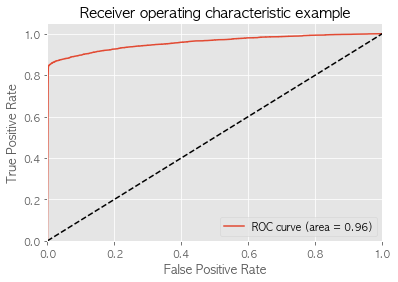

In [135]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_probs, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

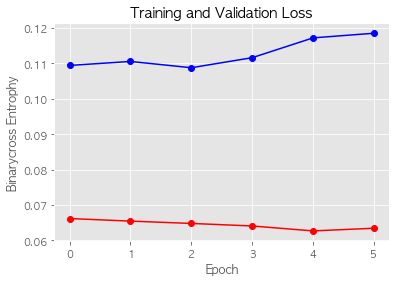

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Binarycross Entrophy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

#overfitting이 되고 있다.

In [156]:
pred_probs = model.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[[0.   ]
 [1.   ]
 [0.016]
 [0.999]
 [0.02 ]
 [0.049]
 [1.   ]
 [0.002]
 [0.02 ]
 [0.001]]
예측값 10개만 표시:  [0, 1, 0, 1, 0, 0, 1, 0, 0, 0]


In [157]:
get_clf_eval(y_test, preds)

오차행렬:
 [[32306   120]
 [  678  3699]]

정확도: 0.9783
정밀도: 0.9686
재현율: 0.8451
F1: 0.9026
AUC: 0.9207


In [158]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

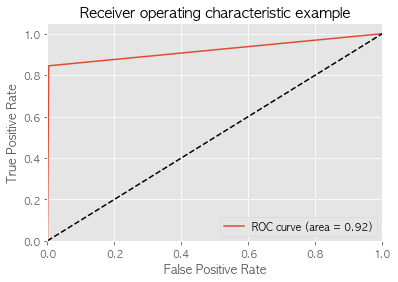

In [159]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()